---
title: "Nudging on a Categorical X Axis"
author: "Damien Martin"
date: "2024-11-13 13:00"
categories: [data-vis, plotnine, snippet]
image: "image.jpg"
description: "When looking at two different groups, we often want a 'grouped' effect (similar to grouped bar charts) for error bars. This shows how to create grouped error bars when the X axis is categorical."
---

# Problem

Let's create a box-and-whiskers plot from some fake data that looks at spend at two different fast food chains by gender:

In [1]:
#| code-fold: true

import pandas as pd
import numpy as np
import plotnine as p9 

eating_data = pd.concat(
    [
        pd.DataFrame({'gender': 'male', 'restaurant': 'McDonalds', 'spend': np.random.normal(loc=18, scale=5, size=50)}),
        pd.DataFrame({'gender': 'male', 'restaurant': 'KFC', 'spend': np.random.normal(loc=22, scale=8, size=50)}),
        pd.DataFrame({'gender': 'female', 'restaurant': 'McDonalds', 'spend': np.random.normal(loc=14, scale=3, size=50)}),
        pd.DataFrame({'gender': 'female', 'restaurant': 'KFC', 'spend': np.random.normal(loc=20, scale=4, size=50)}),
    ]     
)

eating_data.head()

,gender,restaurant,spend
0,male,McDonalds,8.077477
1,male,McDonalds,20.414522
2,male,McDonalds,24.262335
3,male,McDonalds,18.109223
4,male,McDonalds,22.113395


A box and whisker plot will "dodge" the two genders automatically, without any work from us:

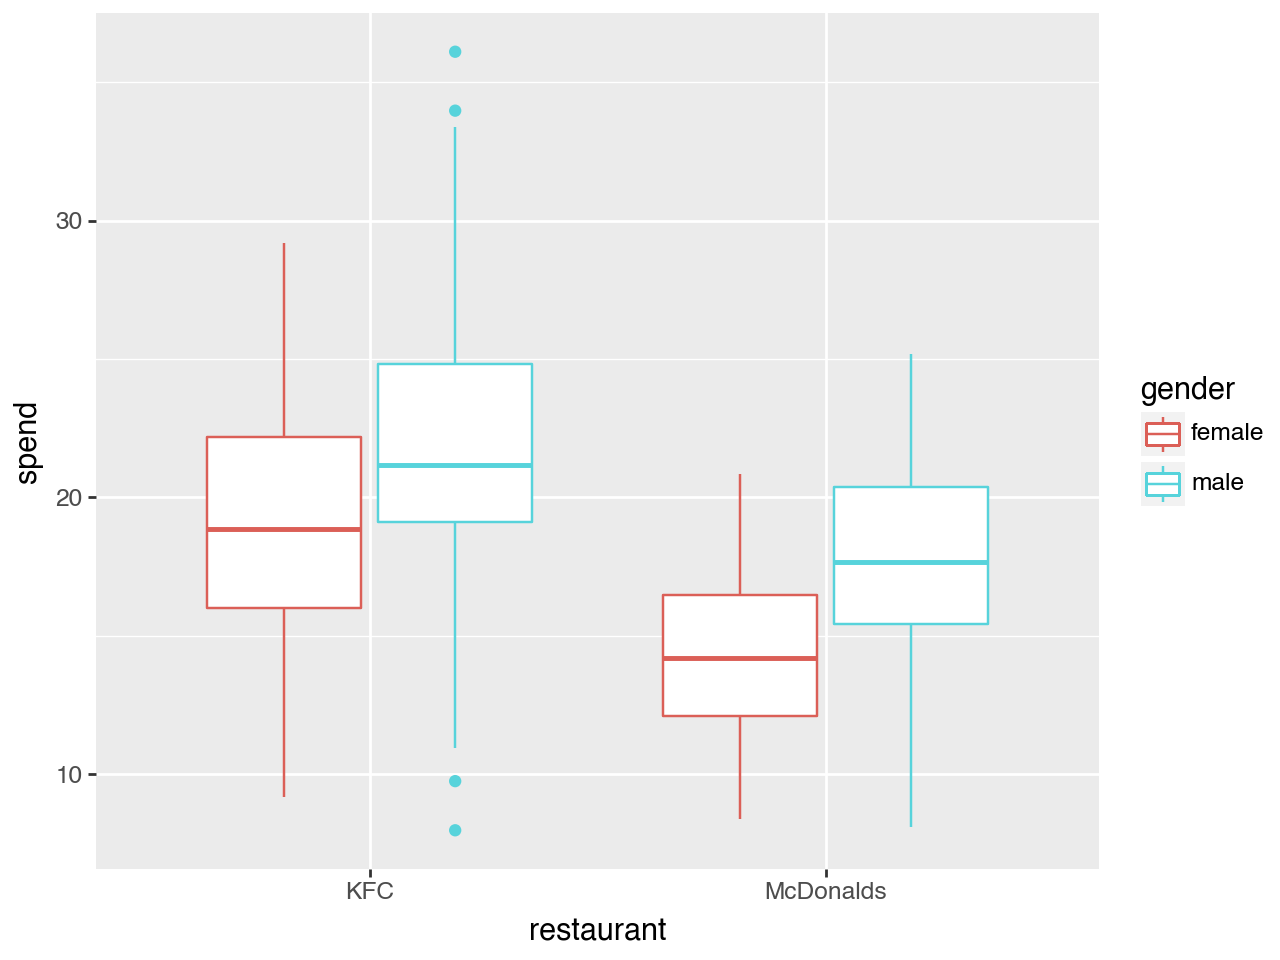

In [2]:
(
    p9.ggplot(eating_data, p9.aes(x='restaurant', y='spend', color="gender"))
    + p9.geom_boxplot()
)

What we are looking to do is something similar for the error bars. Constructing standard errors:

In [3]:
summary_stats = eating_data.groupby(['restaurant', 'gender']).agg(
    avg_spend=('spend', 'mean'),
    std_err=('spend', lambda r: r.std()/r.count()**0.5),
).assign(
    ci95_low = lambda r: r.avg_spend - 1.96*r.std_err
).assign(
    ci95_high = lambda r: r.avg_spend + 1.96*r.std_err
).reset_index()

summary_stats

,restaurant,gender,avg_spend,std_err,ci95_low,ci95_high
0,KFC,female,19.120673,0.644163,17.858113,20.383232
1,KFC,male,21.791898,0.899169,20.029527,23.554270
2,McDonalds,female,14.097081,0.436464,13.241611,14.952551
3,McDonalds,male,17.557519,0.645195,16.292937,18.822100


We want to make the following plot:

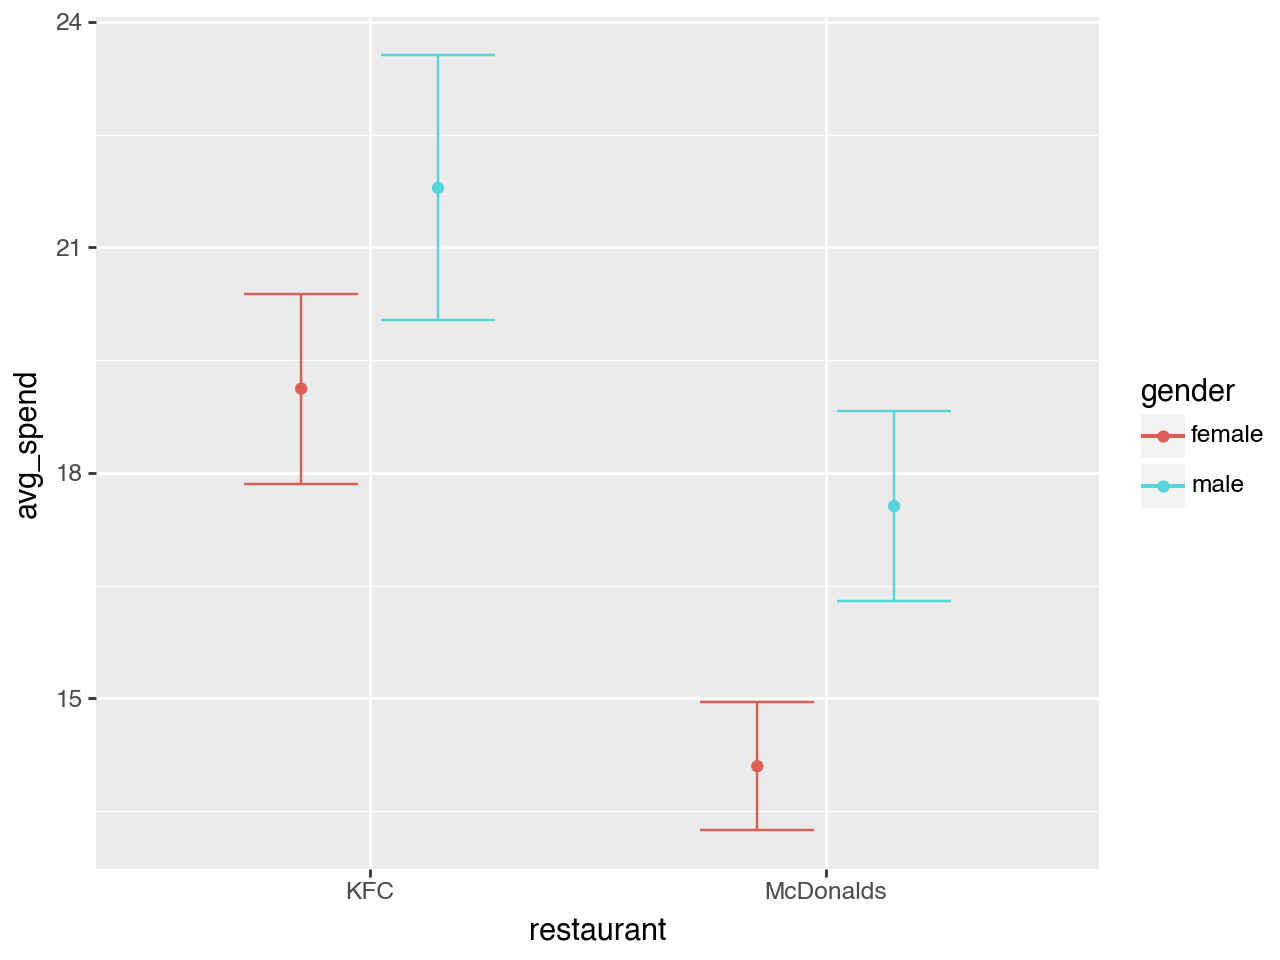

In [4]:
#| echo: false
position = p9.position_dodge(width=0.6)
(
    p9.ggplot(summary_stats, p9.aes(x='restaurant', color='gender', y='avg_spend'))
    + p9.geom_point(position=position)
    + p9.geom_errorbar(mapping=p9.aes(ymin='ci95_low', ymax='ci95_high'), position=position)
)

# Solution

Use the `position` argument for the `geom_point` and `geom_errorbar`.

# Example

If we don't use any adjustments, we don't quite get what we want, as the bars overlap:

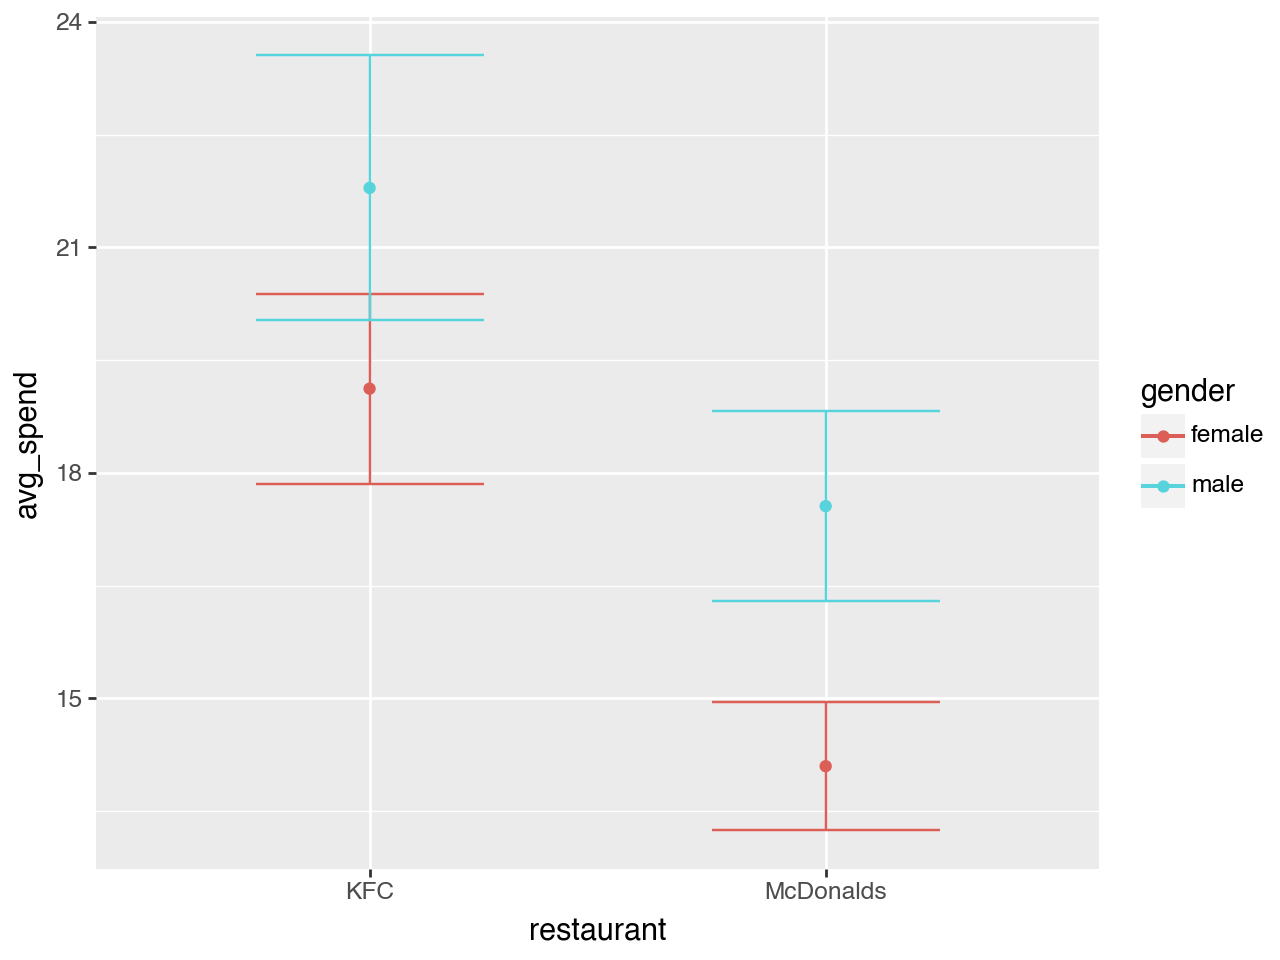

In [5]:
(
    p9.ggplot(summary_stats, p9.aes(x='restaurant', color='gender', y='avg_spend'))
    + p9.geom_point()
    + p9.geom_errorbar(mapping=p9.aes(ymin='ci95_low', ymax='ci95_high'))
)

We can create a position object and pass it in as follows. 

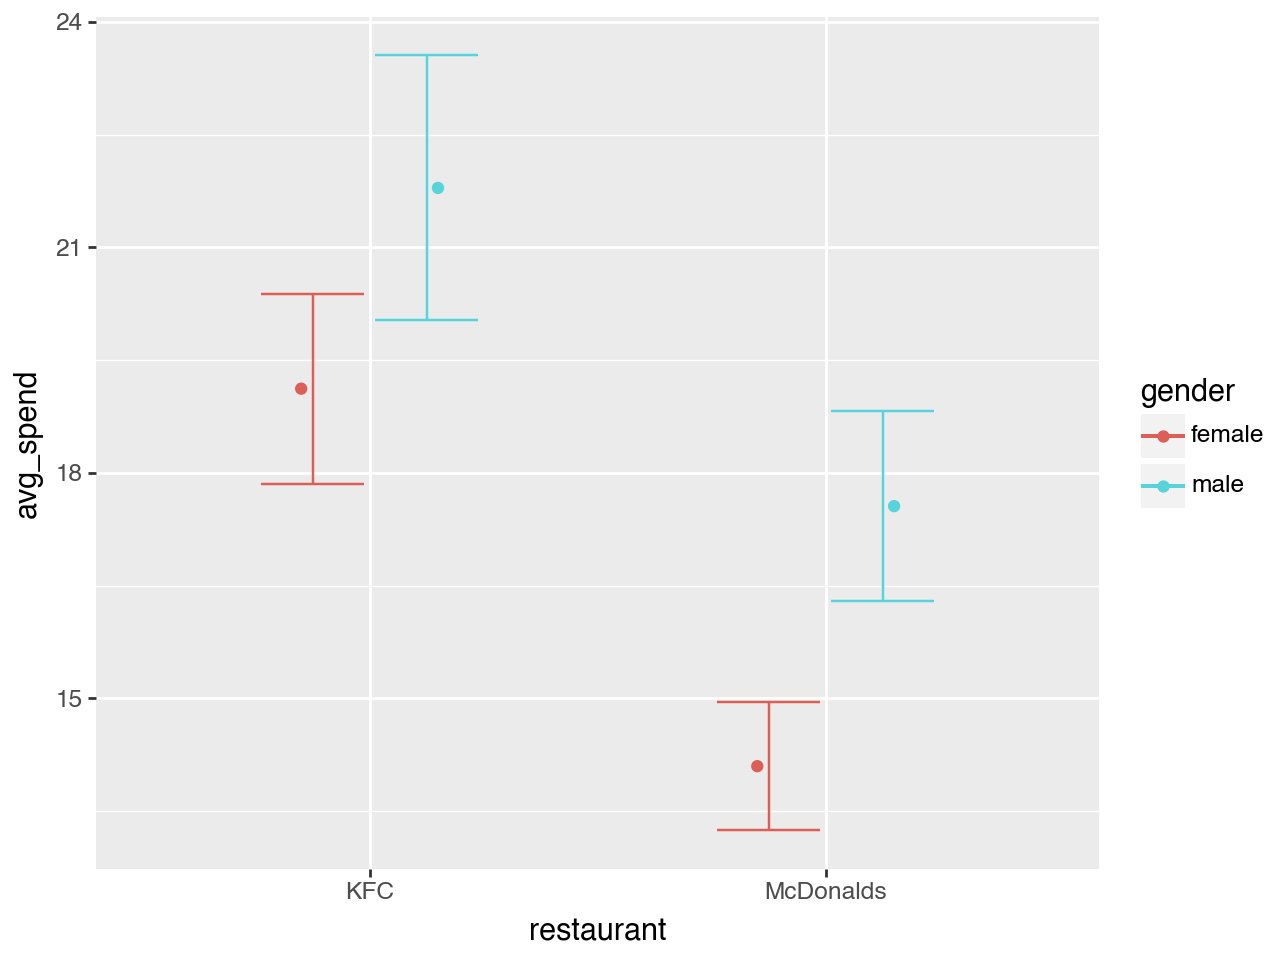

In [6]:
position = p9.position_dodge2(width=0.6)
(
    p9.ggplot(summary_stats, p9.aes(x='restaurant', color='gender', y='avg_spend'))
    + p9.geom_point(position=position)
    + p9.geom_errorbar(mapping=p9.aes(ymin='ci95_low', ymax='ci95_high'), position=position)
)

The `position_dodge` lines everything up the way we want:

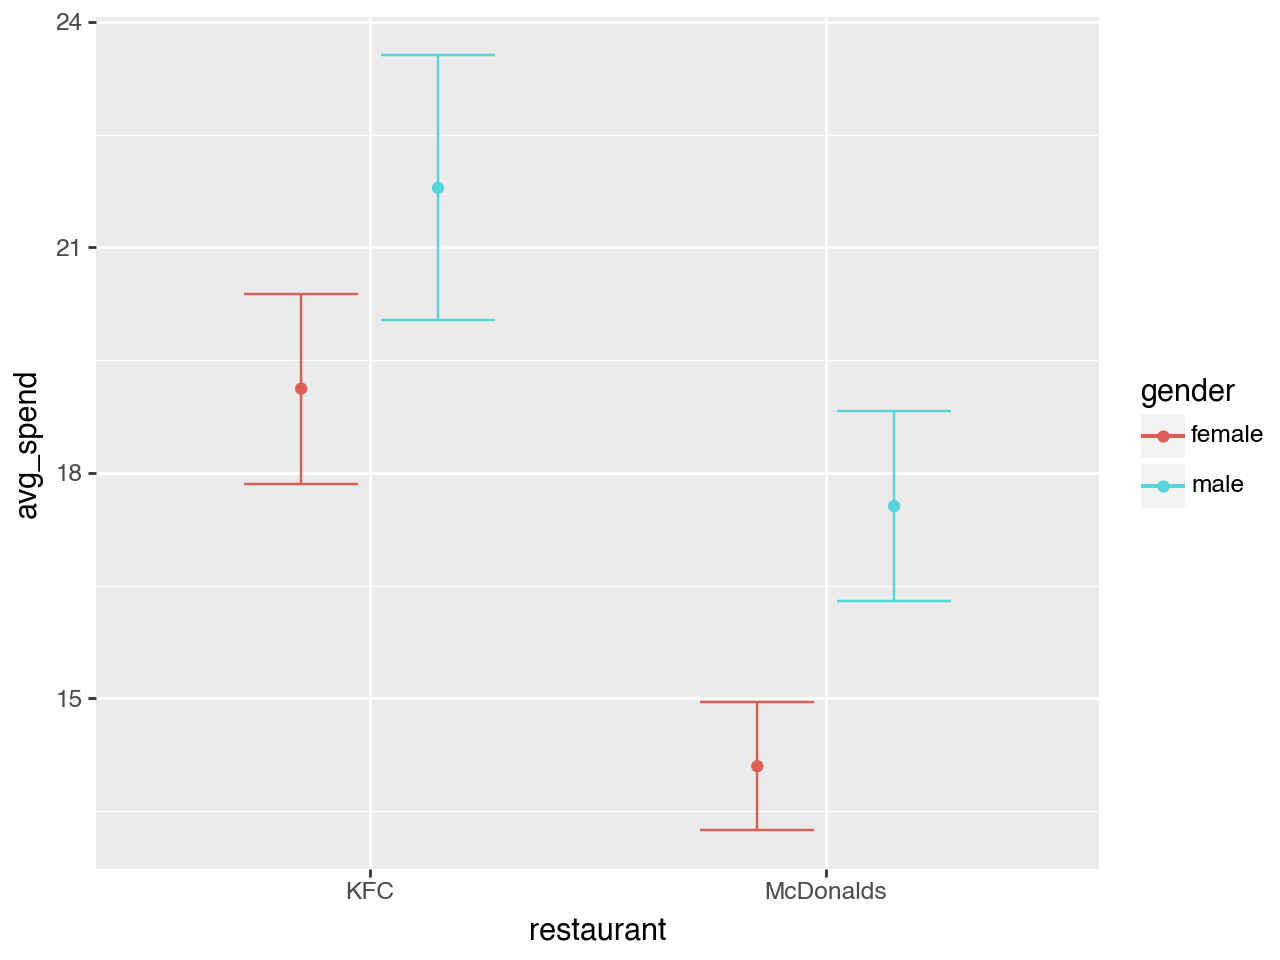

In [7]:
(
    p9.ggplot(summary_stats, p9.aes(x='restaurant', color='gender', y='avg_spend'))
    + p9.geom_point(position=p9.position_dodge(width=0.6))
    + p9.geom_errorbar(
        mapping=p9.aes(ymin='ci95_low', ymax='ci95_high'), 
        position=p9.position_dodge(width=0.6)
    )
)

More examples are in this excellent [stack overflow](https://stackoverflow.com/questions/78229915/what-is-the-difference-between-position-dodge-and-position-dodge2) answer.